By :- Swaraj Sawarkar

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-bright','dark_background'])

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
from sklearn.impute import KNNImputer

In [9]:
imputer = KNNImputer(n_neighbors= 5)
df['bmi']=imputer.fit_transform(df[['bmi']])

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

In [11]:
n_df = df[['id','age','hypertension','heart_disease',	'avg_glucose_level']]
n_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level
0,9046,67.0,0,1,228.69
1,51676,61.0,0,0,202.21
2,31112,80.0,0,1,105.92
3,60182,49.0,0,0,171.23
4,1665,79.0,1,0,174.12


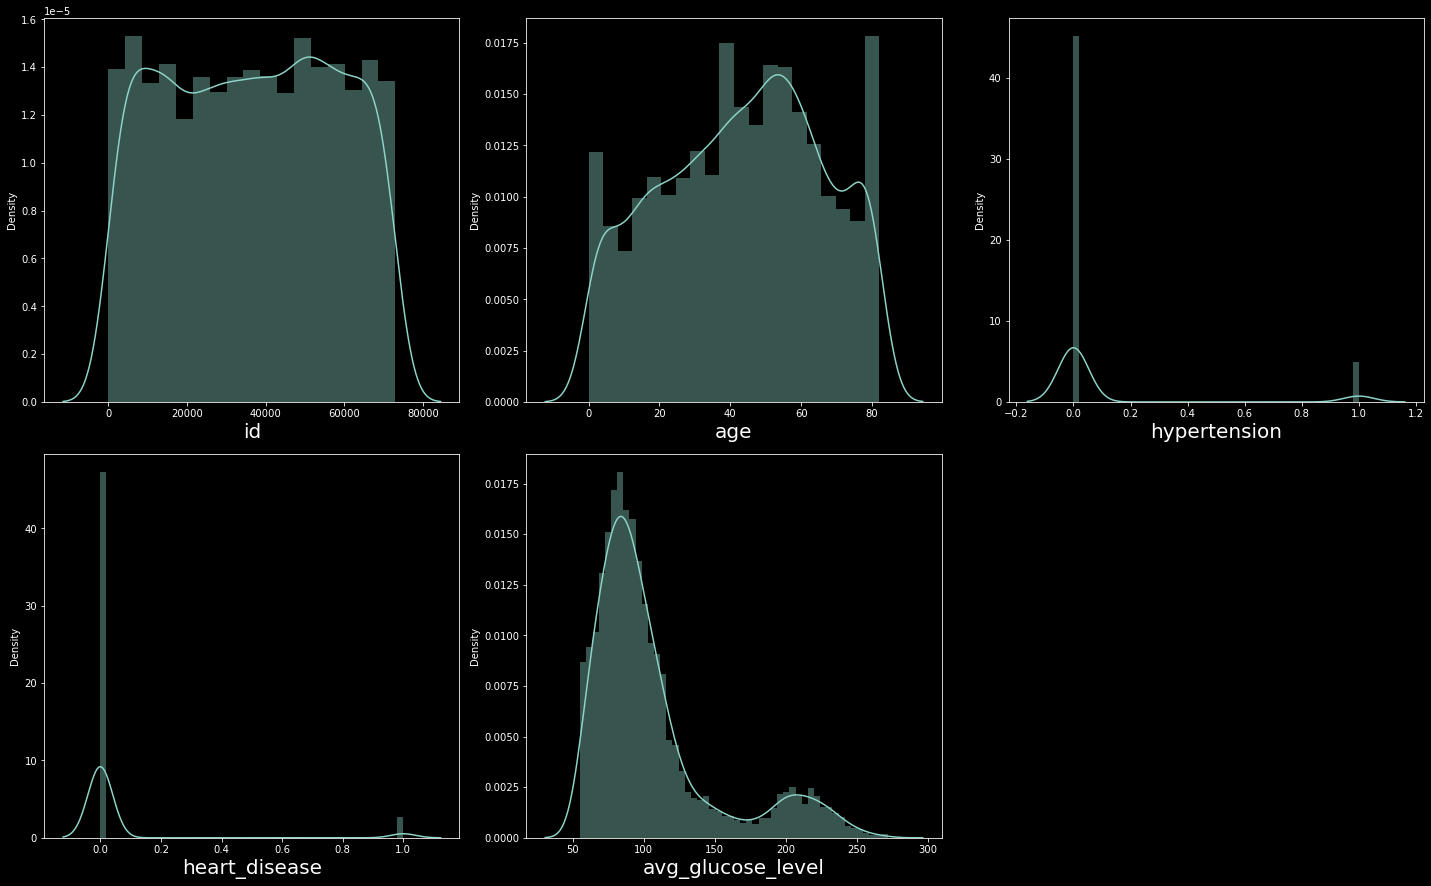

In [12]:
plt.figure(figsize=(20,30))
plotnumber=1

for column in n_df:
  if plotnumber<=15:
    ax = plt.subplot(5,3,plotnumber)
    sns.distplot(n_df[column])
    plt.xlabel(column,fontsize = 20)

  plotnumber+=1
plt.tight_layout()   
plt.show() 


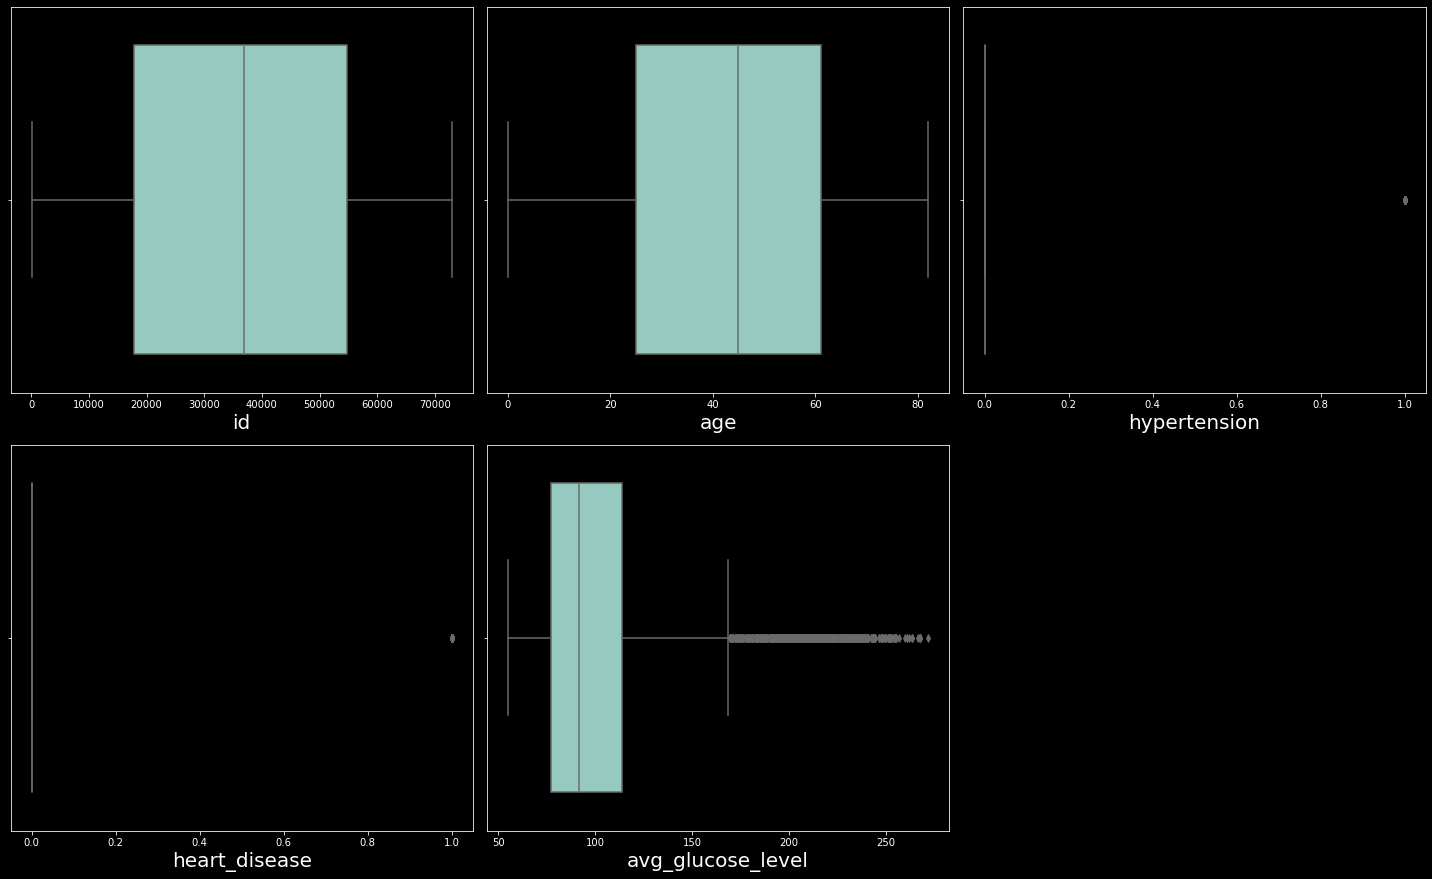

In [13]:
plt.figure(figsize=(20,30))
plotnumber=1

for column in n_df:
  if plotnumber<=15:
    ax = plt.subplot(5,3,plotnumber)
    sns.boxplot(n_df[column])
    plt.xlabel(column,fontsize = 20)

  plotnumber+=1
plt.tight_layout()   
plt.show() 

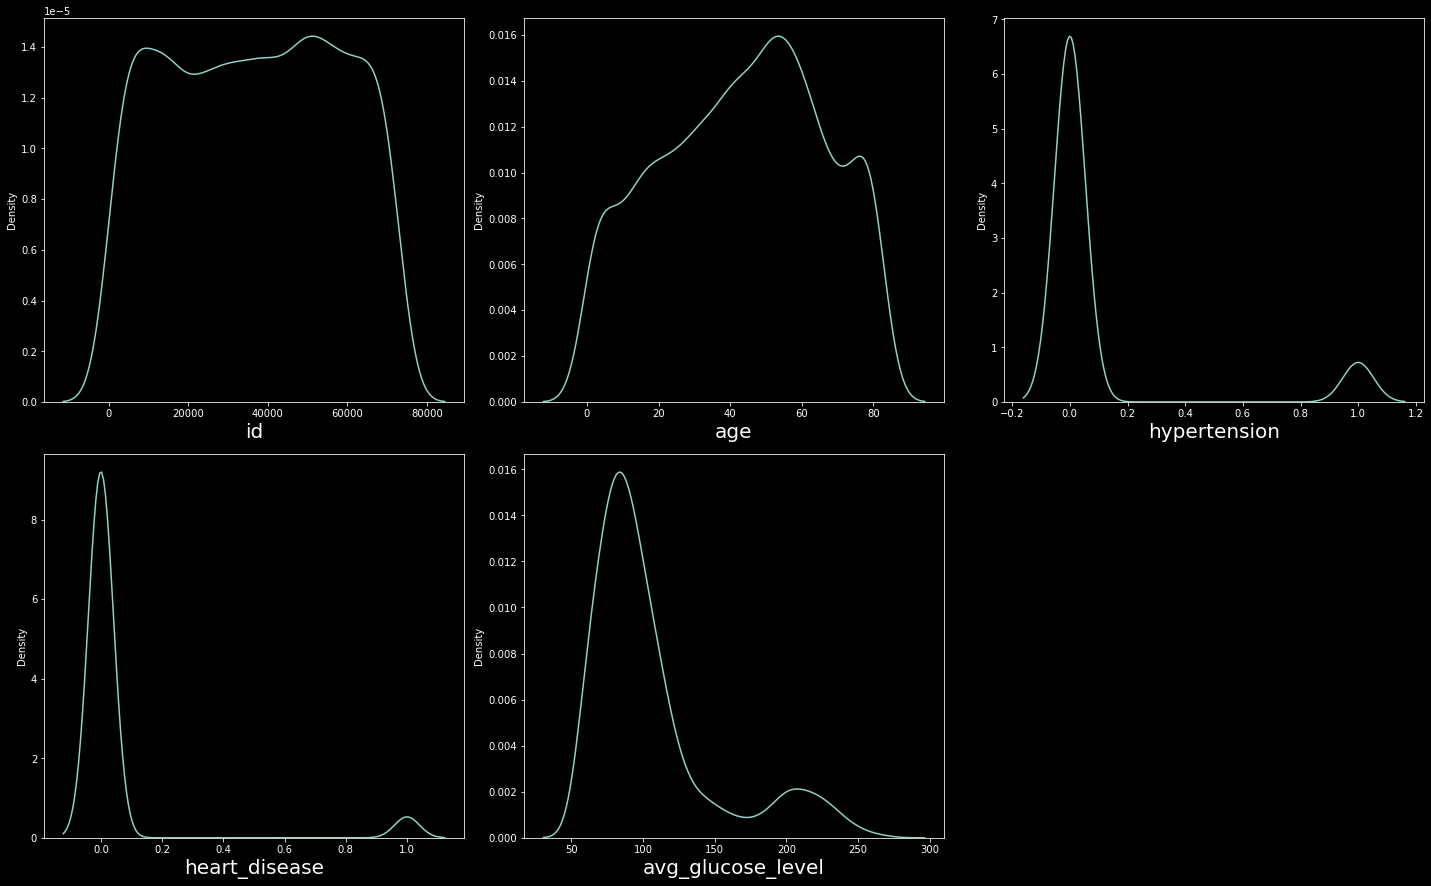

In [14]:
plt.figure(figsize=(20,30))
plotnumber=1

for column in n_df:
  if plotnumber<=15:
    ax = plt.subplot(5,3,plotnumber)
    sns.kdeplot(n_df[column])
    plt.xlabel(column,fontsize = 20)

  plotnumber+=1
plt.tight_layout()   
plt.show() 

In [15]:
# categorical columns

**CATEGORICAL DATA**

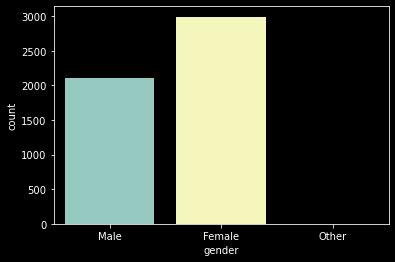

In [16]:
sns.countplot(df['gender'])
plt.show()

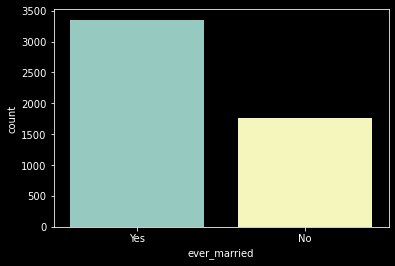

In [17]:
'''id	gender	age	hypertension	heart_disease	ever_married	work_type	Residence_type	avg_glucose_level	bmi	smoking_status	stroke'''
sns.countplot(df['ever_married'])
plt.show()

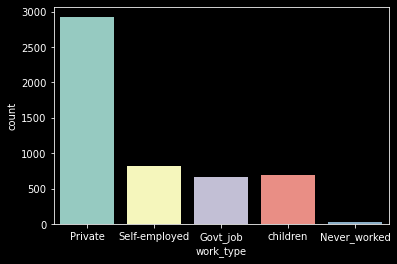

In [18]:
sns.countplot(df['work_type'])
plt.show()


In [19]:
## As the never worked field is very less in number we will drop theses rows.
df = df[df['work_type']!='Never_worked']

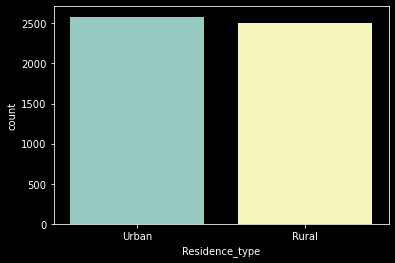

In [20]:
sns.countplot(df['Residence_type'])
plt.show()

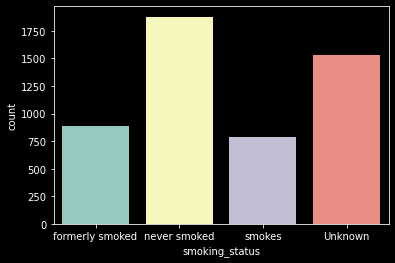

In [21]:
sns.countplot(df['smoking_status'])
plt.show()

**HANDLING CATEGORICAL DATA**

In [22]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [23]:
df['smoking_status'].value_counts()

never smoked       1878
Unknown            1536
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [24]:
df.smoking_status.nunique()

4

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5088 non-null   int64  
 1   gender             5088 non-null   object 
 2   age                5088 non-null   float64
 3   hypertension       5088 non-null   int64  
 4   heart_disease      5088 non-null   int64  
 5   ever_married       5088 non-null   object 
 6   work_type          5088 non-null   object 
 7   Residence_type     5088 non-null   object 
 8   avg_glucose_level  5088 non-null   float64
 9   bmi                5088 non-null   float64
 10  smoking_status     5088 non-null   object 
 11  stroke             5088 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 645.8+ KB


In [26]:
df['stroke'].value_counts()

0    4839
1     249
Name: stroke, dtype: int64

In [27]:
df.gender.value_counts()

Female    2983
Male      2104
Other        1
Name: gender, dtype: int64

In [28]:
df = df[df['gender']!='Other']

In [29]:
gender = pd.get_dummies(df[['gender']],drop_first=True)
gender.head()

,gender_Male
0,1
1,0
2,1
3,0
4,0


In [30]:
ever_married = pd.get_dummies(df[['ever_married']],drop_first=True)
ever_married.head()

,ever_married_Yes
0,1
1,1
2,1
3,1
4,1


In [31]:
work_type = pd.get_dummies(df[['work_type']],drop_first=False)
work_type.head()

,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [32]:
Residence_type = pd.get_dummies(df[['Residence_type']],drop_first=True)
Residence_type.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [33]:
smoking_status = pd.get_dummies(df[['smoking_status']],drop_first=True)
smoking_status.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [34]:
data=pd.concat([df,gender,ever_married,work_type,Residence_type,smoking_status],axis=1)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,1,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,1,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0,1,0,0,1,0,0,0,1,0


In [35]:
data = data.drop(columns=['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,1,0,0,1,0,0,0,1,0


In [36]:
data = data.drop(columns=['id'])
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,1,0,0,0,1,0


In [37]:
correlation = data.corr()
correlation

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.275591,0.263395,0.238153,0.325364,0.244859,-0.026923,0.676840,0.128419,0.111363,0.326843,-0.638566,0.015837,0.235823,0.122666,0.071114
hypertension,0.275591,1.000000,0.107991,0.174427,0.159939,0.127613,0.021525,0.162935,0.017125,-0.007024,0.114871,-0.130169,-0.007504,0.058412,0.066001,0.030625
heart_disease,0.263395,0.107991,1.000000,0.161848,0.038507,0.134702,0.086073,0.113658,0.000916,-0.001131,0.086336,-0.092104,0.003412,0.066504,-0.021386,0.043611
avg_glucose_level,0.238153,0.174427,0.161848,1.000000,0.169105,0.131911,0.054477,0.154781,0.013555,0.015395,0.062433,-0.102706,-0.004268,0.067448,0.024404,0.017327
bmi,0.325364,0.159939,0.038507,0.169105,1.000000,0.038580,-0.025104,0.335128,0.077367,0.202939,0.070126,-0.444874,0.000607,0.104103,0.106210,0.084944
stroke,0.244859,0.127613,0.134702,0.131911,0.038580,1.000000,0.009274,0.107403,0.002285,0.010828,0.061755,-0.084312,0.015790,0.064271,-0.003634,0.008506
gender_Male,-0.026923,0.021525,0.086073,0.054477,-0.025104,0.009274,1.000000,-0.029316,-0.016351,-0.031793,-0.025785,0.089759,-0.005198,0.043585,-0.098221,0.011762
ever_married_Yes,0.676840,0.162935,0.113658,0.154781,0.335128,0.107403,-0.029316,1.000000,0.132257,0.148232,0.190895,-0.549470,0.008115,0.170006,0.106694,0.103045
work_type_Govt_job,0.128419,0.017125,0.000916,0.013555,0.077367,0.002285,-0.016351,0.132257,1.000000,-0.447756,-0.168698,-0.152171,0.013667,0.029127,0.047919,0.029305
work_type_Private,0.111363,-0.007024,-0.001131,0.015395,0.202939,0.010828,-0.031793,0.148232,-0.447756,1.000000,-0.509319,-0.459423,-0.016348,0.022959,0.108376,0.098292


**HEATMAP**

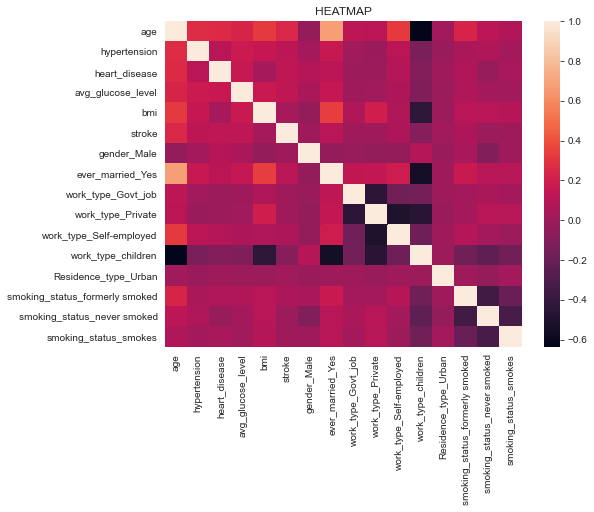

In [38]:
sns.set({'figure.figsize':(8,6)})
sns.heatmap(data=correlation)
plt.title('HEATMAP')
plt.show()

In [39]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [40]:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],

(['age',
  'hypertension',
  'heart_disease',
  'avg_glucose_level',
  'bmi',
  'stroke',
  'gender_Male',
  'ever_married_Yes',
  'work_type_Govt_job',
  'work_type_Private',
  'work_type_Self-employed',
  'work_type_children',
  'Residence_type_Urban',
  'smoking_status_formerly smoked',
  'smoking_status_never smoked',
  'smoking_status_smokes'],)

lst = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]   15
1 age  2 hypertension  3 heart disease 4 avg_glucose level  5 bmi
6 gender (male,female)  7 ever married (yes,no)  8 work_type (gov job,private,self-employed,children)
9 residence (urban, rural)  10 smoking status (formerly, never, smokes, unknown)

In [41]:
data.shape

(5087, 16)

**SPLIT DATASET INTO TRAIN AND TEST**

In [42]:
X = data.drop(columns=['stroke'],axis =1)
print(X)

       age  hypertension  heart_disease  avg_glucose_level        bmi  \
0     67.0             0              1             228.69  36.600000   
1     61.0             0              0             202.21  28.893237   
2     80.0             0              1             105.92  32.500000   
3     49.0             0              0             171.23  34.400000   
4     79.0             1              0             174.12  24.000000   
...    ...           ...            ...                ...        ...   
5105  80.0             1              0              83.75  28.893237   
5106  81.0             0              0             125.20  40.000000   
5107  35.0             0              0              82.99  30.600000   
5108  51.0             0              0             166.29  25.600000   
5109  44.0             0              0              85.28  26.200000   

      gender_Male  ever_married_Yes  work_type_Govt_job  work_type_Private  \
0               1                 1          

In [43]:
y = data[['stroke']]
print(y)

      stroke
0          1
1          1
2          1
3          1
4          1
...      ...
5105       0
5106       0
5107       0
5108       0
5109       0

[5087 rows x 1 columns]


In [44]:
df = X.copy()

In [45]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,0,1,0,0,1,0,0,0,1,0


In [46]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [47]:
from sklearn.preprocessing import StandardScaler
import pickle
Sc = StandardScaler()
column = X.columns
Sc.fit(X)
X = Sc.transform(X)
pickle_out = open("scaler2.pkl","wb")
pickle.dump(Sc,pickle_out)



X = pd.DataFrame(X,columns=column)

In [48]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.047082,-0.329424,4.175064,2.702177,0.999337,1.190704,0.719131,-0.385106,0.860081,-0.438056,-0.395141,0.985364,2.180487,-0.765003,-0.428455
1,0.781472,-0.329424,-0.239517,2.118093,-0.002047,-0.839839,0.719131,-0.385106,-1.162681,2.282813,-0.395141,-1.014854,-0.458613,1.307185,-0.428455
2,1.622571,-0.329424,4.175064,-0.005825,0.466600,1.190704,0.719131,-0.385106,0.860081,-0.438056,-0.395141,-1.014854,-0.458613,1.307185,-0.428455
3,0.250251,-0.329424,-0.239517,1.434752,0.713478,-0.839839,0.719131,-0.385106,0.860081,-0.438056,-0.395141,0.985364,-0.458613,-0.765003,2.333967
4,1.578303,3.035599,-0.239517,1.498498,-0.637853,-0.839839,0.719131,-0.385106,-1.162681,2.282813,-0.395141,-1.014854,-0.458613,1.307185,-0.428455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1.622571,3.035599,-0.239517,-0.494840,-0.002047,-0.839839,0.719131,-0.385106,0.860081,-0.438056,-0.395141,0.985364,-0.458613,1.307185,-0.428455
5083,1.666840,-0.329424,-0.239517,0.419444,1.441118,-0.839839,0.719131,-0.385106,-1.162681,2.282813,-0.395141,0.985364,-0.458613,1.307185,-0.428455
5084,-0.369507,-0.329424,-0.239517,-0.511604,0.219722,-0.839839,0.719131,-0.385106,-1.162681,2.282813,-0.395141,-1.014854,-0.458613,1.307185,-0.428455
5085,0.338788,-0.329424,-0.239517,1.325788,-0.429956,1.190704,0.719131,-0.385106,0.860081,-0.438056,-0.395141,-1.014854,2.180487,-0.765003,-0.428455


Balancing the dataset

In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sample, y_sample = smote.fit_resample(X, y)

print('Original dataset \n',y.value_counts()) 
print('Resample dataset \n', y_sample.value_counts())

Original dataset 
 stroke
0         4838
1          249
dtype: int64
Resample dataset 
 stroke
0         4838
1         4838
dtype: int64


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_sample,y_sample,test_size=0.15,random_state=1)

In [51]:
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
7688,1.360872,3.035599,-0.239517,2.412402,0.851800,-0.839839,-0.015171,-0.385106,0.860081,-0.438056,-0.395141,0.985364,-0.458613,1.307185,-0.428455
5259,1.664660,-0.329424,4.175064,-0.029313,0.003334,1.190704,0.719131,1.032377,-0.101499,-0.438056,-0.395141,-1.014854,-0.458613,1.307185,-0.428455
1169,-1.431948,-0.329424,-0.239517,0.365403,-1.898230,-0.839839,-1.390568,-0.385106,-1.162681,-0.438056,2.530743,-1.014854,-0.458613,-0.765003,-0.428455
5130,1.456535,-0.329424,-0.239517,-0.405379,-0.002047,-0.839839,-1.390568,-0.385106,0.860081,-0.438056,-0.395141,0.985364,-0.458613,-0.765003,-0.428455
1750,0.205983,-0.329424,-0.239517,2.287716,-0.002047,-0.839839,0.719131,-0.385106,-1.162681,2.282813,-0.395141,-1.014854,-0.458613,-0.765003,2.333967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.737203,-0.329424,-0.239517,-0.815777,0.258703,1.190704,0.719131,-0.385106,0.860081,-0.438056,-0.395141,-1.014854,-0.458613,1.307185,-0.428455
7813,1.365145,-0.329424,-0.239517,-0.050693,0.014468,1.190704,0.719131,-0.385106,0.860081,-0.438056,-0.395141,0.985364,-0.458613,-0.765003,-0.428455
905,-0.502312,-0.329424,-0.239517,-0.640199,0.817427,-0.839839,-1.390568,-0.385106,0.860081,-0.438056,-0.395141,-1.014854,-0.458613,-0.765003,2.333967
5192,1.190486,-0.329424,-0.239517,-0.511997,0.431298,-0.839839,0.719131,-0.385106,-1.162681,2.282813,-0.395141,0.985364,-0.458613,0.489982,-0.428455


**MODEL TRAINING**

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [53]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
#models.append(("SupportVector",SVC()))
models.append(("KNeighbors",KNeighborsClassifier()))


In [54]:
for name,model in models:
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print(name,"train score =",train_score)
    print(name,"test score =",test_score)

LogisticRegression train score = 0.7945038910505836
LogisticRegression test score = 0.7858126721763086
DecisionTree train score = 1.0
DecisionTree test score = 0.8966942148760331
RandomForest train score = 1.0
RandomForest test score = 0.9511019283746557
KNeighbors train score = 0.9348249027237354
KNeighbors test score = 0.8980716253443526


In [55]:
## Lets try auc-roc

In [56]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = KNeighborsClassifier()

In [57]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)


pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
pred_prob3 = model3.predict_proba(x_test)
pred_prob4 = model4.predict_proba(x_test)

In [58]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [59]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])


print(auc_score1,",", auc_score2,"," ,auc_score3,",",auc_score4)
"""0.7955840455840456 , 0.5598290598290598 , 0.7695868945868946 , 0.6559829059829061"""

0.8457538863249938 , 0.8929021435511294 , 0.992217861914015 , 0.9619033883896041


'0.7955840455840456 , 0.5598290598290598 , 0.7695868945868946 , 0.6559829059829061'

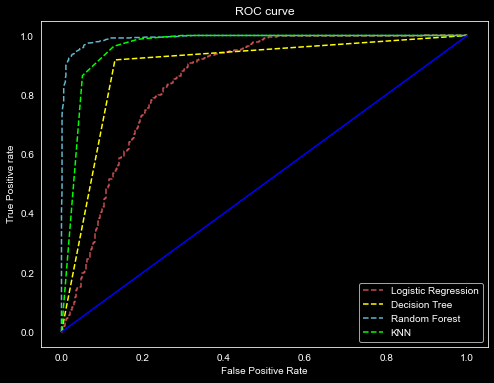

In [60]:
plt.style.use(['seaborn-bright','dark_background'])
plt.plot(fpr1, tpr1, linestyle='--',color='r', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='c', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='lime', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
plt.grid(b=None)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

In [61]:
## Random Forest seems to be best

In [62]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

### Saving model

In [63]:
import pickle

In [64]:
pickle_out = open("stroke.pkl","wb")
pickle.dump(model,pickle_out)

In [65]:
loaded_model = pickle.load(open("stroke.pkl","rb"))
result = loaded_model.score(x_test,y_test)
print(result)

0.9490358126721763


In [66]:
scal = pickle.load(open("scaler2.pkl","rb"))

In [67]:
x_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
7130,1.181909,-0.329424,4.175064,2.930053,-0.355835,-0.839839,0.719131,-0.385106,0.860081,-0.438056,-0.395141,-1.014854,-0.458613,1.307185,-0.428455
6878,1.349978,3.035599,-0.239517,2.771344,0.357200,0.095363,0.719131,-0.385106,0.860081,-0.438056,-0.395141,0.064128,-0.458613,1.307185,-0.428455
1396,0.515861,-0.329424,-0.239517,-0.407271,-0.248046,1.190704,0.719131,-0.385106,0.860081,-0.438056,-0.395141,0.985364,-0.458613,-0.765003,-0.428455
1117,-1.077801,-0.329424,-0.239517,-0.206107,0.167748,1.190704,-1.390568,-0.385106,0.860081,-0.438056,-0.395141,-1.014854,2.180487,-0.765003,-0.428455
7834,1.211529,3.035599,-0.239517,-0.446180,-0.035339,1.045914,0.719131,-0.385106,-1.162681,2.282813,-0.395141,-1.014854,-0.458613,-0.765003,-0.231478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,-1.210606,-0.329424,-0.239517,-0.686520,-0.702821,-0.839839,-1.390568,-0.385106,0.860081,-0.438056,-0.395141,0.985364,-0.458613,1.307185,-0.428455
7079,0.958069,3.035599,-0.239517,0.106917,0.310957,-0.839839,0.719131,2.596684,-1.162681,-0.438056,-0.395141,-1.014854,1.884099,-0.532282,-0.428455
6977,0.676896,-0.329424,-0.239517,-0.165731,-0.009454,-0.839839,0.719131,-0.385106,0.860081,-0.438056,-0.395141,-1.014854,2.180487,-0.765003,-0.428455
8767,0.717674,3.035599,4.175064,0.653638,1.184431,0.702980,0.719131,-0.385106,0.860081,-0.438056,-0.395141,0.985364,-0.458613,-0.765003,2.333967


In [68]:
pred = model.predict(x_test)